In [1]:
from typing import Callable

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from functools import partial


def ext_log_barrier_quadra_2(t, z):
    if z <= - 1 / t**2:
        return - np.log(-z) / t
    else:
        return t * z**2 + - np.log(-1 / t**2) / t - 1 / t**3


def ext_log_barrier_quadra(t, z):
    if z <= - 1 / t:
        return - np.log(-z) / t
    else:
        return t * z**2 - np.log(1/t) / t - 1 / t


def ext_log_barrier(t, z):
    if z <= - 1 / t**2:
        return - np.log(-z) / t
    else:
        return t * z / 10 + -np.log(1 / (t**2)) / t + 1 / t / 10


def log_barrier(t, z):
    if z <= - 1 / t**2:
        return - np.log(-z) / t
    else:
        return t * z + -np.log(1 / (t**2)) / t + 1 / t


def quadratic(z):
    return np.maximum(z, 0) ** 2


def relu(z):
    return np.maximum(z, 0)

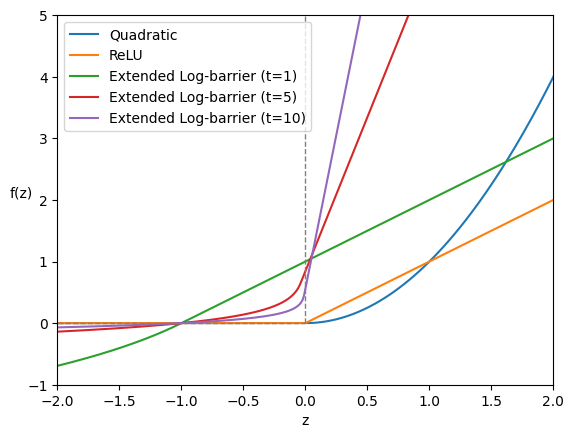

In [3]:
v_penalty: Callable = np.vectorize(quadratic)
v_relu: Callable = np.vectorize(relu)
# matplotlib.rc('font', **{'size': 12})
# matplotlib.rc('text', usetex=True)
xs: np.ndarray = np.linspace(-2, 2, 2000, dtype=np.float32)
plt.plot(xs, v_penalty(xs), label='Quadratic')
plt.plot(xs, v_relu(xs), label='ReLU')
for t in [1,5,10]:
    v_barrier = np.vectorize(partial(ext_log_barrier, t))
    plt.plot(xs, v_barrier(xs), label=f'Extended Log-barrier (t={t})')
plt.plot([0, 0], [0, 100], linewidth=1, color='gray', linestyle='--')
plt.plot([-100, 0], [0, 0], linewidth=1, color='gray', linestyle='--')
plt.xlabel('z')
plt.ylabel('f(z)', rotation=0)
plt.ylim(-1, 5)
plt.xlim(-2, 2)
plt.legend(loc='upper left')
plt.show()